# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as dt  

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low = -90, high = 90, size=1500)
lngs = np.random.uniform(low = -180, high = 180, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:


count = 0
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

print(f"Beginning Data Retrieval")
print(f"------------------------------")
for city in cities:
        url = (f'https://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}')
#         print(url)
        weather_response = requests.get(url)
        weather_json = weather_response.json()
#         print(weather_json)
        try: 
            Cloudiness.append(weather_json['clouds']["all"])
            Country.append(weather_json['sys']["country"])
            Date.append(weather_json["dt"])
            Humidity.append(weather_json["main"]['humidity'])
            Lat.append(weather_json["coord"]['lat'])
            Lng.append(weather_json["coord"]['lon'])
            Max_Temp.append(weather_json["main"]['temp_max'])
            Wind_Speed.append(weather_json["wind"]['speed'])
            print( "Requesting " , count,"......" ,city)
            count = count + 1
            
        except KeyError:
        
            Cloudiness.append("")
            Country.append("")
            Date.append("")
            Humidity.append("")
            Lat.append("")
            Lng.append("")
            Max_Temp.append("")
            Wind_Speed.append("")
            print("Requesting " , count,"......" ,city, ".....Empty value, try again...")
            count = count + 1
# print(Cloudiness)
#             pass

Beginning Data Retrieval
------------------------------
Requesting  0 ...... mys shmidta .....Empty value, try again...
Requesting  1 ...... te anau
Requesting  2 ...... sentyabrskiy .....Empty value, try again...
Requesting  3 ...... hostotipaquillo
Requesting  4 ...... hervey bay
Requesting  5 ...... port alfred
Requesting  6 ...... hobart
Requesting  7 ...... ushuaia
Requesting  8 ...... meyungs .....Empty value, try again...
Requesting  9 ...... vila franca do campo
Requesting  10 ...... chara
Requesting  11 ...... poum
Requesting  12 ...... halalo .....Empty value, try again...
Requesting  13 ...... albany
Requesting  14 ...... esperance
Requesting  15 ...... caldwell
Requesting  16 ...... mar del plata
Requesting  17 ...... bredasdorp
Requesting  18 ...... bluff
Requesting  19 ...... coahuayana
Requesting  20 ...... eureka
Requesting  21 ...... georgetown
Requesting  22 ...... asau
Requesting  23 ...... leningradskiy
Requesting  24 ...... busselton
Requesting  25 ...... cape town

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#display the data frame
cities_df = pd.DataFrame({
                            "City" : cities, 
                            "Cloudiness" : Cloudiness,
                            "Country" : Country, 
                            "Date" : Date,
                            "Humidity" : Humidity, 
                            "Lat" : Lat,
                            "Lng" : Lng,
                            "Max_Temp" : Max_Temp,
                            "Wind_Speed" : Wind_Speed
                        })
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,mys shmidta,,,,,,,,
1,te anau,100,NZ,1595206482,92,-45.42,167.72,45.81,2.13
2,sentyabrskiy,,,,,,,,
3,hostotipaquillo,49,MX,1595206482,73,21.07,-104.07,73.99,2.71
4,hervey bay,0,AU,1595206482,46,-25.3,152.85,69.8,8.05
...,...,...,...,...,...,...,...,...,...
615,cap-aux-meules,20,CA,1595206630,77,47.38,-61.86,69.8,8.05
616,catamarca,0,AR,1595206630,57,-28.47,-65.79,60.01,1.01
617,aswan,5,EG,1595206630,18,24.09,32.91,86.23,10.27
618,onokhoy,20,RU,1595206630,48,51.93,108.07,62.6,6.71


In [5]:
cities_df.count()

City          620
Cloudiness    620
Country       620
Date          620
Humidity      620
Lat           620
Lng           620
Max_Temp      620
Wind_Speed    620
dtype: int64

In [6]:
#save the file into a CSV file in the Resources Folder
cities_df.to_csv("Resources/cities.csv", encoding="utf-8", index=False)

In [7]:
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        620 non-null    object
 1   Cloudiness  620 non-null    object
 2   Country     620 non-null    object
 3   Date        620 non-null    object
 4   Humidity    620 non-null    object
 5   Lat         620 non-null    object
 6   Lng         620 non-null    object
 7   Max_Temp    620 non-null    object
 8   Wind_Speed  620 non-null    object
dtypes: object(9)
memory usage: 43.7+ KB


In [8]:
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,mys shmidta,,,,,,,,
1,te anau,100,NZ,1595206482,92,-45.42,167.72,45.81,2.13
2,sentyabrskiy,,,,,,,,
3,hostotipaquillo,49,MX,1595206482,73,21.07,-104.07,73.99,2.71
4,hervey bay,0,AU,1595206482,46,-25.3,152.85,69.8,8.05
...,...,...,...,...,...,...,...,...,...
615,cap-aux-meules,20,CA,1595206630,77,47.38,-61.86,69.8,8.05
616,catamarca,0,AR,1595206630,57,-28.47,-65.79,60.01,1.01
617,aswan,5,EG,1595206630,18,24.09,32.91,86.23,10.27
618,onokhoy,20,RU,1595206630,48,51.93,108.07,62.6,6.71


In [9]:
nan_value = float("NaN")
cities_df.replace("", nan_value, inplace = True)
cities_df.dropna(subset = ["Cloudiness"], inplace = True)
cities_df.dropna(subset = ["Country"], inplace = True)
cities_df.dropna(subset = ["Cloudiness"], inplace = True)
cities_df.dropna(subset = ["Date"], inplace = True)
cities_df.dropna(subset = ["Humidity"], inplace = True)
cities_df.dropna(subset = ["Lat"], inplace = True)
cities_df.dropna(subset = ["Lng"], inplace = True)
cities_df.dropna(subset = ["Max_Temp"], inplace = True)
cities_df.dropna(subset = ["Wind_Speed"], inplace = True)
clean_city_data_df = cities_df
clean_city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
1,te anau,100.0,NZ,1.595206e+09,92.0,-45.42,167.72,45.81,2.13
3,hostotipaquillo,49.0,MX,1.595206e+09,73.0,21.07,-104.07,73.99,2.71
4,hervey bay,0.0,AU,1.595206e+09,46.0,-25.30,152.85,69.80,8.05
5,port alfred,0.0,ZA,1.595206e+09,49.0,-33.59,26.89,60.94,6.87
6,hobart,40.0,AU,1.595206e+09,57.0,-42.88,147.33,48.20,19.46
...,...,...,...,...,...,...,...,...,...
614,heilbron,0.0,ZA,1.595207e+09,55.0,-27.28,27.97,40.64,10.40
615,cap-aux-meules,20.0,CA,1.595207e+09,77.0,47.38,-61.86,69.80,8.05
616,catamarca,0.0,AR,1.595207e+09,57.0,-28.47,-65.79,60.01,1.01
617,aswan,5.0,EG,1.595207e+09,18.0,24.09,32.91,86.23,10.27


In [10]:
clean_city_data_df.count()

City          573
Cloudiness    573
Country       573
Date          573
Humidity      573
Lat           573
Lng           573
Max_Temp      573
Wind_Speed    573
dtype: int64

In [11]:
clean_city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573 entries, 1 to 618
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        573 non-null    object 
 1   Cloudiness  573 non-null    float64
 2   Country     573 non-null    object 
 3   Date        573 non-null    float64
 4   Humidity    573 non-null    float64
 5   Lat         573 non-null    float64
 6   Lng         573 non-null    float64
 7   Max_Temp    573 non-null    float64
 8   Wind_Speed  573 non-null    float64
dtypes: float64(7), object(2)
memory usage: 44.8+ KB


In [12]:
#Save the new clean file in the same folder as the other file
clean_city_data_df.to_csv("Resources/clean_cities.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
clean_city_data_hum_df = clean_city_data_df[clean_city_data_df["Humidity"]>100]
clean_city_data_hum_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed


There are no cities with Humidity higher tham 100, so we proceed to next step

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

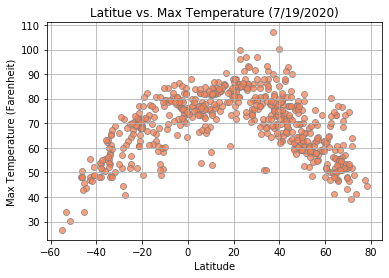

<Figure size 432x288 with 0 Axes>

In [14]:
lat = clean_city_data_df ["Lat"]
temp = clean_city_data_df ["Max_Temp"]

plt.scatter(lat, temp,color="coral", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title("Latitue vs. Max Temperature (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Plot_Lat_vs_Temp.png")

## Latitude vs. Humidity Plot

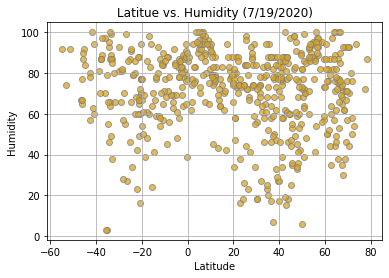

<Figure size 432x288 with 0 Axes>

In [15]:
lat = clean_city_data_df ["Lat"]
hum = clean_city_data_df ["Humidity"]

plt.scatter(lat, hum,color="goldenrod", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitue vs. Humidity (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Plot_Lat_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

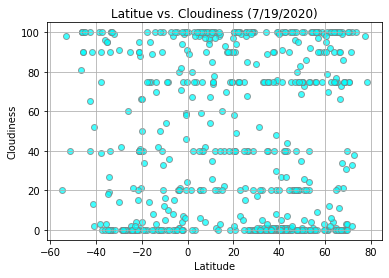

<Figure size 432x288 with 0 Axes>

In [16]:
lat = clean_city_data_df ["Lat"]
cloud = clean_city_data_df ["Cloudiness"]

plt.scatter(lat, cloud,color="aqua", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitue vs. Cloudiness (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Plot_Lat_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

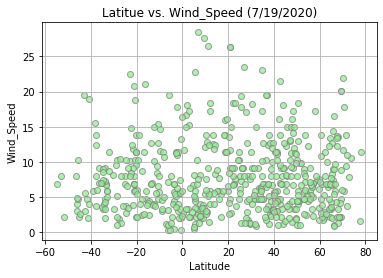

<Figure size 432x288 with 0 Axes>

In [17]:
lat = clean_city_data_df ["Lat"]
wind = clean_city_data_df ["Wind_Speed"]

plt.scatter(lat, wind,color="lightgreen", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.title("Latitue vs. Wind_Speed (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Plot_Lat_vs_WindSpeed.png")

## Linear Regression

In [18]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = clean_city_data_df[clean_city_data_df["Lat"]>0]
northern_hemisphere_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
3,hostotipaquillo,49.0,MX,1.595206e+09,73.0,21.07,-104.07,73.99,2.71
9,vila franca do campo,40.0,PT,1.595206e+09,68.0,37.72,-25.43,68.00,1.12
10,chara,100.0,RU,1.595206e+09,89.0,56.91,118.26,55.15,2.26
13,albany,100.0,US,1.595206e+09,62.0,42.60,-73.97,87.01,4.00
15,caldwell,1.0,US,1.595206e+09,18.0,43.66,-116.69,93.00,8.05
...,...,...,...,...,...,...,...,...,...
611,gimli,5.0,CA,1.595207e+09,99.0,50.63,-96.99,72.00,5.28
613,boa vista,75.0,BR,1.595206e+09,83.0,2.82,-60.67,78.80,2.24
615,cap-aux-meules,20.0,CA,1.595207e+09,77.0,47.38,-61.86,69.80,8.05
617,aswan,5.0,EG,1.595207e+09,18.0,24.09,32.91,86.23,10.27


In [19]:
southern_hemisphere_df = clean_city_data_df[clean_city_data_df["Lat"]<0]
southern_hemisphere_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
1,te anau,100.0,NZ,1.595206e+09,92.0,-45.42,167.72,45.81,2.13
4,hervey bay,0.0,AU,1.595206e+09,46.0,-25.30,152.85,69.80,8.05
5,port alfred,0.0,ZA,1.595206e+09,49.0,-33.59,26.89,60.94,6.87
6,hobart,40.0,AU,1.595206e+09,57.0,-42.88,147.33,48.20,19.46
7,ushuaia,20.0,AR,1.595206e+09,92.0,-54.80,-68.30,26.60,6.93
...,...,...,...,...,...,...,...,...,...
607,tual,100.0,ID,1.595207e+09,84.0,-5.67,132.75,78.51,19.55
609,ibirama,0.0,BR,1.595207e+09,99.0,-27.06,-49.52,61.00,1.32
612,burnie,2.0,AU,1.595207e+09,60.0,-41.07,145.92,48.99,18.99
614,heilbron,0.0,ZA,1.595207e+09,55.0,-27.28,27.97,40.64,10.40


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

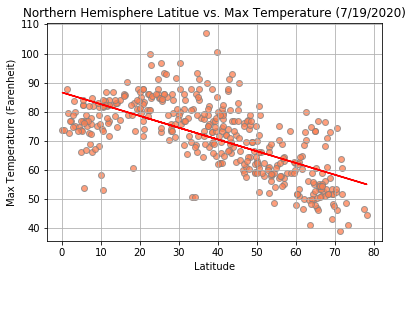

 R-squared is 0.4289565831434149


<Figure size 432x288 with 0 Axes>

In [20]:
n_lat = northern_hemisphere_df ["Lat"]
n_temp = northern_hemisphere_df ["Max_Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_temp)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.scatter(n_lat, n_temp,color="coral", edgecolors="grey", alpha=0.75)
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize = 15, color = "red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title("Northern Hemisphere Latitue vs. Max Temperature (7/19/2020)")

plt.grid()
plt.show()
plt.savefig("Figures/Regression_North_Lat_vs_Temperature.png")
print(f" R-squared is {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

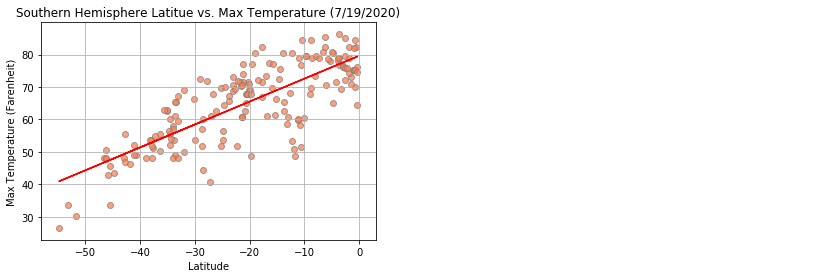

 R-squared is 0.6241121429428006


<Figure size 432x288 with 0 Axes>

In [42]:
s_lat = southern_hemisphere_df ["Lat"]
s_temp = southern_hemisphere_df ["Max_Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_temp)
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(50,50), fontsize = 15, color = "red")

plt.scatter(s_lat, s_temp,color="coral", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title("Southern Hemisphere Latitue vs. Max Temperature (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_South_Lat_vs_Temperature.png")
print(f" R-squared is {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

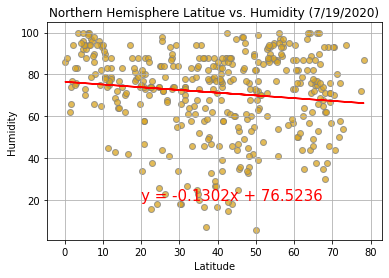

 R-squared is 0.016482198662956086


<Figure size 432x288 with 0 Axes>

In [35]:
n_lat = northern_hemisphere_df ["Lat"]
n_hum = northern_hemisphere_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_hum)
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(20,20), fontsize = 15, color = "red")

plt.scatter(n_lat, n_hum,color="goldenrod", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere Latitue vs. Humidity (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_North_Lat_vs_Humidity.png")
print(f" R-squared is {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

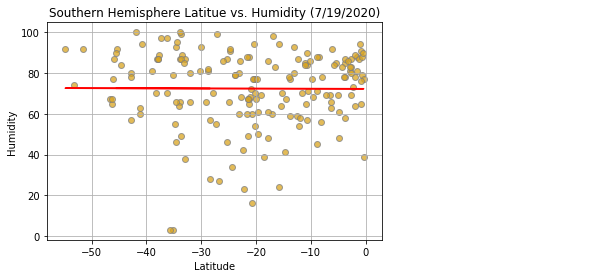

 R-squared is 1.0584970459718258e-05


<Figure size 432x288 with 0 Axes>

In [40]:
s_lat = southern_hemisphere_df ["Lat"]
s_hum = southern_hemisphere_df ["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_hum )
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(10,50), fontsize = 15, color = "red")

plt.scatter(s_lat,s_hum,color="goldenrod", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere Latitue vs. Humidity (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_South_Lat_vs_Humidity.png")
print(f" R-squared is {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

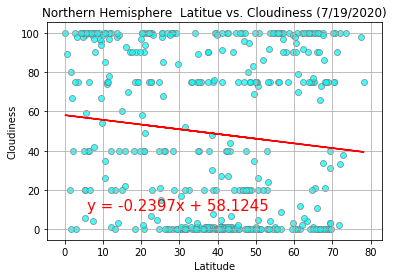

 R-squared is 0.013681446836090903


<Figure size 432x288 with 0 Axes>

In [26]:
n_lat = northern_hemisphere_df ["Lat"]
n_cloud = northern_hemisphere_df ["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_cloud)
regress_values = n_lat* slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize = 15, color = "red")

plt.scatter(n_lat, n_cloud,color="aqua", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere  Latitue vs. Cloudiness (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_North_Lat_vs_Cloudiness.png")
print(f" R-squared is {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

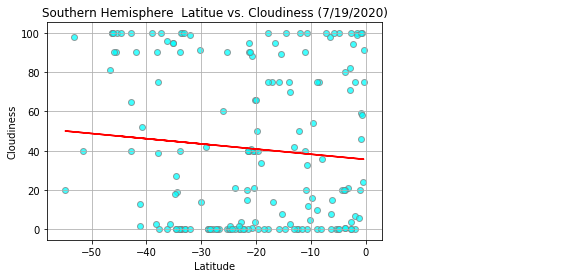

 R-squared is 0.008467207779090194


<Figure size 432x288 with 0 Axes>

In [27]:
s_lat = southern_hemisphere_df ["Lat"]
s_cloud = southern_hemisphere_df ["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_cloud)
regress_values = s_lat* slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize = 15, color = "red")

plt.scatter(s_lat, s_cloud,color="aqua", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere  Latitue vs. Cloudiness (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_South_Lat_vs_Cloudiness.png")
print(f" R-squared is {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

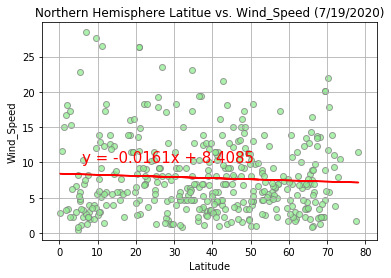

 R-squared is 0.003733803516029628


<Figure size 432x288 with 0 Axes>

In [28]:
n_lat = northern_hemisphere_df ["Lat"]
n_wind = northern_hemisphere_df ["Wind_Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_wind)
regress_values = n_lat* slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize = 15, color = "red")

plt.scatter(n_lat, n_wind,color="lightgreen", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.title("Northern Hemisphere Latitue vs. Wind_Speed (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_North_Lat_vs_Wind.png")
print(f" R-squared is {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

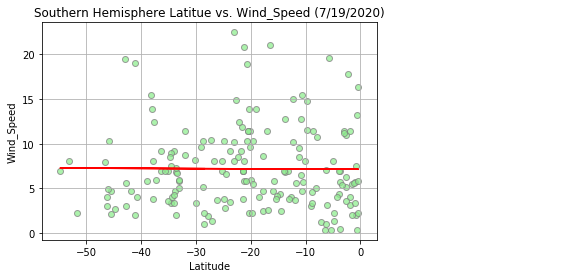

 R-squared is 5.6759414365458175e-05


<Figure size 432x288 with 0 Axes>

In [29]:
s_lat = southern_hemisphere_df ["Lat"]
s_wind = southern_hemisphere_df ["Wind_Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat,s_wind)
regress_values = s_lat* slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize = 15, color = "red")

plt.scatter(s_lat, s_wind,color="lightgreen", edgecolors="grey", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.title("Southern Hemisphere Latitue vs. Wind_Speed (7/19/2020)")
plt.grid()
plt.show()
plt.savefig("Figures/Regression_South_Lat_vs_Wind.png")
print(f" R-squared is {rvalue**2}")